In [1]:
import matplotlib as mpl
mpl.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
mpl.rcParams.update(pgf_with_rc_fonts)

In [2]:
import matplotlib.pyplot as plt
fontsize = 16
plt.rc('text', usetex=True)
plt.rc('font', family='sans',size=fontsize)
plt.rc('legend',fontsize=fontsize)
plt.rc('xtick',labelsize=fontsize)
plt.rc('ytick',labelsize=fontsize)
plt.rc('axes',labelsize=fontsize,titlesize=fontsize)
plt.rc('lines',linewidth=2)
import os
import numpy as np
import prnu
import pandas
from params import images_df_path,camera_dncnn_prnu_df_path,pristine_results_path,results_root,\
                   camera_wavelet_prnu_df_path
from tqdm import tqdm,trange
from scipy.io import loadmat
from PIL import Image
%matplotlib inline

In [3]:
net_name = 'AE5'
method = 'ncc'

images_df = pandas.read_csv(images_df_path, index_col=0)
wavelet_prnu_df = pandas.read_csv(camera_wavelet_prnu_df_path, index_col=0)
dncnn_prnu_df = pandas.read_csv(camera_dncnn_prnu_df_path, index_col=0)
gt = prnu.gt(list(images_df.device), list(wavelet_prnu_df.device))

# DnCNN and Wavelet are almost equivalents

In [9]:
pristine_results = np.load(pristine_results_path).item()
wavelet_wavelet_cc = pristine_results['wavelet_wavelet_cc']
dncnn_wavelet_cc = pristine_results['dncnn_wavelet_cc']

wavelet_dncnn_cc = pristine_results['wavelet_dncnn_cc']
dncnn_dncnn_cc = pristine_results['dncnn_dncnn_cc']

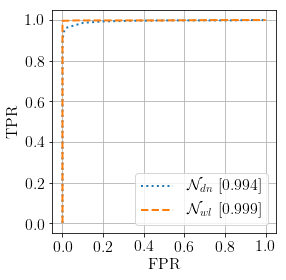

In [10]:
# Compute and plot stats
wavelet_wavelet_stats = prnu.stats(wavelet_wavelet_cc[method], gt)
wavelet_wavelet_abs_stats = prnu.stats(np.abs(wavelet_wavelet_cc[method]), gt)
dncnn_wavelet_stats = prnu.stats(dncnn_wavelet_cc[method], gt)
wavelet_dncnn_stats = prnu.stats(wavelet_dncnn_cc[method], gt)
dncnn_dncnn_stats = prnu.stats(dncnn_dncnn_cc[method], gt)

plt.figure(figsize=(4,4))
plt.plot(dncnn_wavelet_stats['fpr'],dncnn_wavelet_stats['tpr'],label=r'$\mathcal{N}_{\text{dn}}$' + (r' [{:.3f}]'.format(dncnn_wavelet_stats['auc'])),linestyle=':')
plt.plot(wavelet_wavelet_stats['fpr'],wavelet_wavelet_stats['tpr'],label=r'$\mathcal{N}_{\text{wl}}$' + (r' [{:.3f}]'.format(wavelet_wavelet_stats['auc'])),linestyle='--')

plt.xlabel(r'FPR'); plt.ylabel(r'TPR');
plt.grid();
plt.legend();
plt.axis('image');
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0]);plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0]);
plt.xlim([-0.05,1.05]); plt.ylim([-0.05,1.05]);

plt.tight_layout();
plt.savefig('figures/wavelet_dncnn.pdf',bbox_inches='tight')

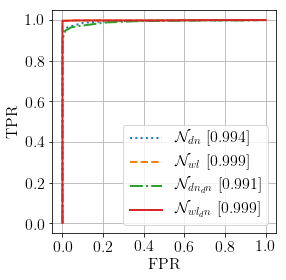

In [11]:
plt.figure(figsize=(4,4))
plt.plot(dncnn_wavelet_stats['fpr'],dncnn_wavelet_stats['tpr'],label=r'$\mathcal{N}_{\text{dn}}$' + (r' [{:.3f}]'.format(dncnn_wavelet_stats['auc'])),linestyle=':')
plt.plot(wavelet_wavelet_stats['fpr'],wavelet_wavelet_stats['tpr'],label=r'$\mathcal{N}_{\text{wl}}$' + (r' [{:.3f}]'.format(wavelet_wavelet_stats['auc'])),linestyle='--')
plt.plot(dncnn_dncnn_stats['fpr'], dncnn_dncnn_stats['tpr'], label=r'$\mathcal{N}_{\text{dn_dn}}$' + (r' [{:.3f}]'.format(dncnn_dncnn_stats['auc'])),linestyle='-.')
plt.plot(wavelet_dncnn_stats['fpr'],wavelet_dncnn_stats['tpr'],label=r'$\mathcal{N}_{\text{wl_dn}}$' + (r' [{:.3f}]'.format(wavelet_dncnn_stats['auc'])),linestyle='-')

plt.xlabel(r'FPR'); plt.ylabel(r'TPR');
plt.grid();
plt.legend();
plt.axis('image');
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0]);plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0]);
plt.xlim([-0.05,1.05]); plt.ylim([-0.05,1.05]);

plt.tight_layout();
plt.savefig('figures/wavelet_dncnn_full.pdf',bbox_inches='tight')

# Varying min PSNR results

In [12]:
# Load results files
an_prnu_type = 'wavelet'
ev_prnu_type = 'dncnn'
option = 'kan-{}_kev-{}'.format(an_prnu_type,ev_prnu_type)
min_psnr_list = [37,38,39,40,41]
results={}
for min_psnr in min_psnr_list:
    results_root_net = os.path.join(results_root,option, net_name + '_minpsnr-{:.1f}'.format(min_psnr))
    results_path_net = os.path.join(results_root_net,'results.npy')
    results[min_psnr] = np.load(results_path_net).item()

In [13]:
# Compute stats
for min_psnr in min_psnr_list:
    results[min_psnr]['gt'] = prnu.gt(list(results[min_psnr]['denoised_df'].device), list(wavelet_prnu_df.device))
    results[min_psnr]['wavelet_stats_'+method] = prnu.stats((results[min_psnr]['denoised_wavelet_cc'][method]), results[min_psnr]['gt'],500)
    results[min_psnr]['wavelet_abs_stats_'+method] = prnu.stats((np.abs(results[min_psnr]['denoised_wavelet_cc'][method])), results[min_psnr]['gt'],500)
    results[min_psnr]['dncnn_stats_'+method] = prnu.stats((results[min_psnr]['denoised_dncnn_cc'][method]), results[min_psnr]['gt'],500)

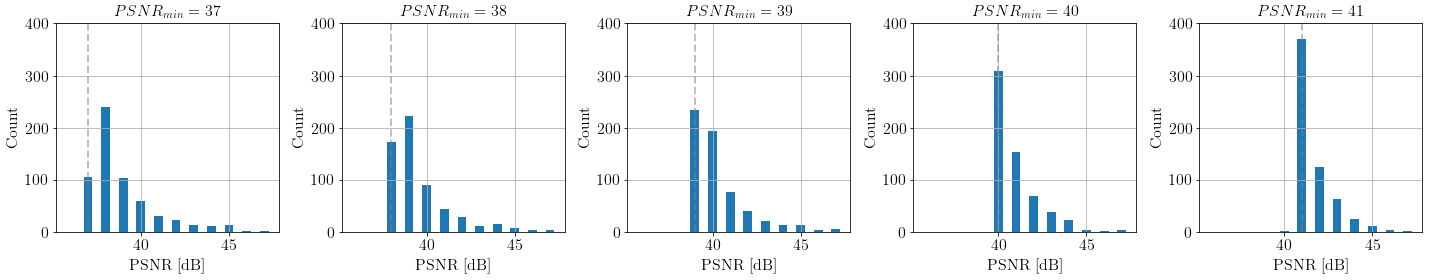

In [17]:
# PSNR histograms
plt.figure(figsize=(4*len(min_psnr_list),4))
for idx,min_psnr in enumerate(min_psnr_list):
    plt.subplot(1,len(min_psnr_list),idx+1)
    histvals, edges = np.histogram(np.array(results[min_psnr]['denoised_df'].psnr),bins=np.arange(35.5,48.5))
    centers = (edges[1:]+edges[:-1])/2
    plt.bar(centers,histvals,width=0.5)
    plt.plot([min_psnr,min_psnr],[0,400],color='gray',linestyle='--',alpha = 0.5)
    plt.grid();
    plt.xlabel('PSNR [dB]')
    plt.ylabel('Count')
    plt.ylim([0,400])
    plt.title(r'$\text{PSNR}_{\text{min}}' + (u'={:d}$'.format(min_psnr)))
    plt.tight_layout()
plt.savefig('figures/psnr_hist.pdf',bbox_inches='tight')


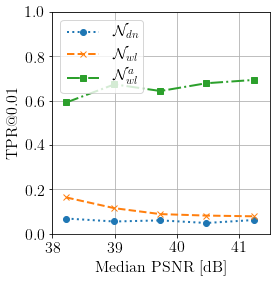

In [18]:
# Median PSNR vs TPR@0.01
case_keys = ['dncnn_stats_'+method, 'wavelet_stats_'+method , 'wavelet_abs_stats_'+method]#,'wavelet_neg_stats_'+method ]

median_psnr = []
tpr001 = dict()
for key in case_keys:
    tpr001[key] = []
for idx,min_psnr in enumerate(min_psnr_list):
    median_psnr += [np.median(results[min_psnr]['denoised_df'].psnr)]
    for key in case_keys:
        fpr001_idx = np.argmin(np.abs(results[min_psnr][key]['fpr'] - 0.01))
        tpr001[key] += [results[min_psnr][key]['tpr'][fpr001_idx]]

plt.figure(figsize=(4,4))

plt.plot(median_psnr,tpr001[case_keys[0]],label=r'$\mathcal{N}_{\text{dn}}$',linestyle=':',marker='o')
plt.plot(median_psnr,tpr001[case_keys[1]],label=r'$\mathcal{N}_{\text{wl}}$',linestyle='--',marker='x')
plt.plot(median_psnr,tpr001[case_keys[2]],label=r'$\mathcal{N}_{\text{wl}}^a$',linestyle='-.',marker='s')

plt.grid();
plt.xlabel('Median PSNR [dB]')
plt.ylabel('TPR@0.01')
plt.legend(loc='upper left')
plt.tight_layout();
plt.ylim([0,1])
plt.xlim([38,41.5])
plt.xticks([38,39,40,41]);
plt.savefig('figures/psnr_tpr.pdf',bbox_inches='tight');

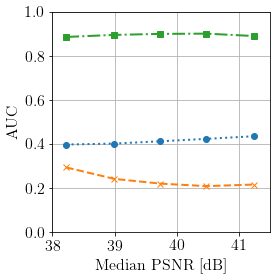

In [19]:
# Median PSNR vs AUC
median_psnr = []
auc = dict()
for key in case_keys:
    auc[key] = []
for idx,min_psnr in enumerate(min_psnr_list):
    median_psnr += [np.median(results[min_psnr]['denoised_df'].psnr)]
    for key in case_keys:
        auc[key] += [results[min_psnr][key]['auc']]

plt.figure(figsize=(4,4))

plt.plot(median_psnr,auc[case_keys[0]],label=r'$\mathcal{N}_{\text{dn}}$',linestyle=':',marker='o')
plt.plot(median_psnr,auc[case_keys[1]],label=r'$\mathcal{N}_{\text{wl}}$',linestyle='--',marker='x')
plt.plot(median_psnr,auc[case_keys[2]],label=r'$\mathcal{N}_{\text{wl}}^a$',linestyle='-.',marker='s')

plt.grid();
plt.xlabel('Median PSNR [dB]')
plt.ylabel('AUC')

plt.ylim([0,1])
plt.xlim([38,41.5])
plt.xticks([38,39,40,41]);
plt.tight_layout();

plt.savefig('figures/psnr_auc.pdf',bbox_inches='tight');

# ROC curves

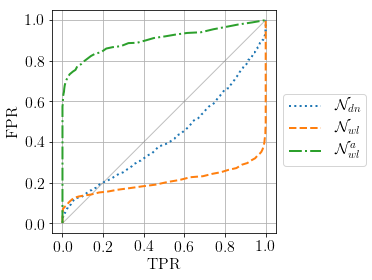

In [20]:
min_psnr_roc = 40

plt.figure(figsize=(4,4))

fpr = dict()
tpr = dict()
for key in case_keys:
    fpr[key] = results[min_psnr_roc][key]['fpr']
    tpr[key] = results[min_psnr_roc][key]['tpr']

plt.plot([0,1],[0,1],linestyle='-',linewidth='1',color='gray',alpha=0.5)
plt.plot(fpr[case_keys[0]],tpr[case_keys[0]],label=r'$\mathcal{N}_{\text{dn}}$',linestyle=':',marker='')
plt.plot(fpr[case_keys[1]],tpr[case_keys[1]],label=r'$\mathcal{N}_{\text{wl}}$',linestyle='--',marker='')
plt.plot(fpr[case_keys[2]],tpr[case_keys[2]],label=r'$\mathcal{N}_{\text{wl}}^a$',linestyle='-.',marker='')

plt.grid();
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend(loc=(1.03,0.3));
plt.axis('image');
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0]);plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0]);
plt.xlim([-0.05,1.05]); plt.ylim([-0.05,1.05]);
plt.tight_layout();

plt.savefig('figures/roc_minpsnr-{}.pdf'.format(min_psnr_roc),bbox_inches='tight');

# NCC values distribution

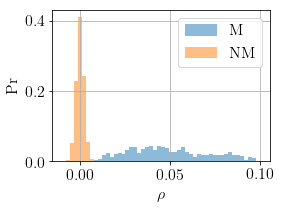

In [54]:
plt.figure(figsize=(4,3))

hist_range = [-0.01,0.1]
histval,edges = np.histogram(wavelet_wavelet_cc[method].flatten()[gt.astype(np.bool).flatten()],bins=50, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='M',alpha=0.5)

histval,edges = np.histogram(wavelet_wavelet_cc[method].flatten()[(1-gt).astype(np.bool).flatten()],bins=edges, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='NM',alpha=0.5)

plt.grid();
plt.xlabel(r'$\rho$')
plt.ylabel('Pr')
plt.legend();

plt.tight_layout();

plt.savefig('figures/ncc_pristine_wavelet.pdf',bbox_inches='tight');

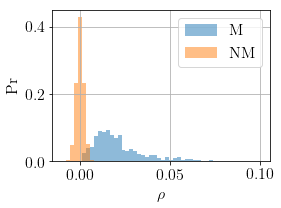

In [55]:
plt.figure(figsize=(4,3))

hist_range = [-0.01,0.1]
histval,edges = np.histogram(dncnn_wavelet_cc[method].flatten()[gt.astype(np.bool).flatten()],bins=50, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='M',alpha=0.5)

histval,edges = np.histogram(dncnn_wavelet_cc[method].flatten()[(1-gt).astype(np.bool).flatten()],bins=edges, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='NM',alpha=0.5)

plt.grid();
plt.xlabel(r'$\rho$')
plt.ylabel('Pr')
plt.legend();

plt.tight_layout();

plt.savefig('figures/ncc_pristine_dncnn.pdf',bbox_inches='tight');

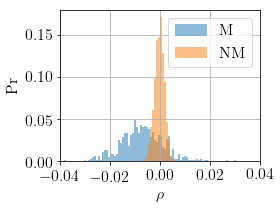

In [58]:
plt.figure(figsize=(4,3))

hist_range = [-0.04,0.04]
histval,edges = np.histogram(results[min_psnr_roc]['denoised_wavelet_cc'][method].flatten()[results[min_psnr_roc]['gt'].astype(np.bool).flatten()],bins=100, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='M',alpha=0.5)

histval,edges = np.histogram(results[min_psnr_roc]['denoised_wavelet_cc'][method].flatten()[(1-results[min_psnr_roc]['gt']).astype(np.bool).flatten()],bins=edges, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='NM',alpha=0.5)

plt.grid();
plt.xlabel(r'$\rho$')
plt.ylabel('Pr')
plt.legend();
plt.xlim([-0.04,0.04]);

plt.tight_layout();

plt.savefig('figures/ncc_denoised_minpsnr-{}_wavelet.pdf'.format(min_psnr_roc),bbox_inches='tight');

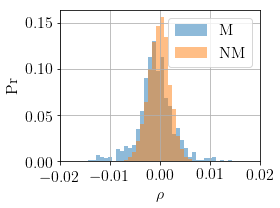

In [57]:
plt.figure(figsize=(4,3))

hist_range = [-0.04,0.04]
histval,edges = np.histogram(results[min_psnr_roc]['denoised_dncnn_cc'][method].flatten()[results[min_psnr_roc]['gt'].astype(np.bool).flatten()],bins=100, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='M',alpha=0.5)

histval,edges = np.histogram(results[min_psnr_roc]['denoised_dncnn_cc'][method].flatten()[(1-results[min_psnr_roc]['gt']).astype(np.bool).flatten()],bins=edges, range=hist_range)
centers = (edges[1:] + edges[:-1])/2
histval = histval / np.sum(histval)
plt.bar(centers,histval,width=(edges[1] - edges[0]),label='NM',alpha=0.5)

plt.grid();
plt.xlabel(r'$\rho$')
plt.ylabel('Pr')
plt.legend();
plt.xlim([-0.02,0.02]);

plt.tight_layout();

plt.savefig('figures/ncc_denoised_minpsnr-{}_dncnn.pdf'.format(min_psnr_roc),bbox_inches='tight');